In [ ]:
from IPython.display import HTML; HTML(f"""<style>{open("./styles/styles.css").read()}</style>""")

<center>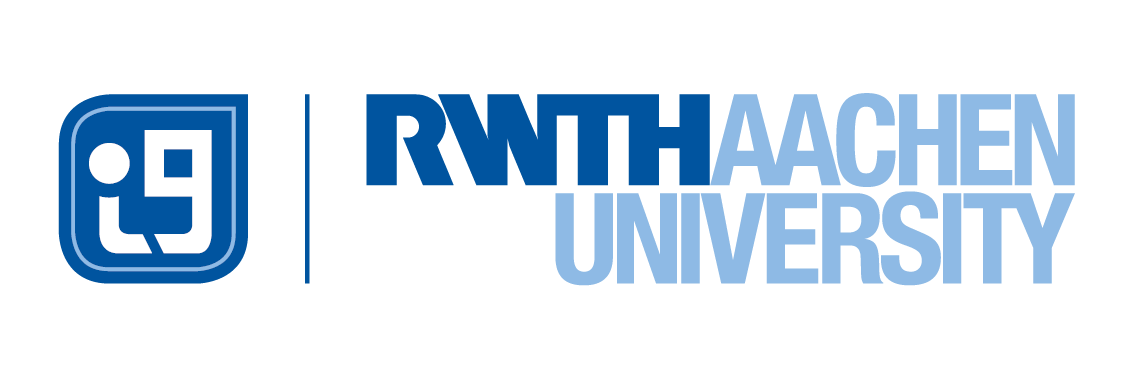</center>

<a id="top"></a>
# File Handling & Exceptions
## Overview
### [File Handling](#file_handling)
* [Reading Text & `with` Statement](#readingTextAndWithStatement)
* [Writing Text: New File and Appending](#writingText)
* [Reading & Writing `CSV`](#readingWritingCsv)
* [Object Serialization](#objectSerialization)
### [Exceptions](#exceptions)
* [Most common Exceptions](#commonExceptions)
* [Exceptions vs. Syntax Errors](#syntaxErrors)
* [Raising an Exception](#raisingException)
* [Exception Handling](#exceptionHandling)
  * [Handling Various Exceptions](#variousExceptions)
* [Exception Handling along the Call Stack](#exceptionHandlingCallStack)
* [Defining your own Exceptions](#definingOwnExceptions)
  * [Inheriting from Exception](#inheritingFromException) 

<a id="file_handling"></a>
# File Handling

Reading content from a file is pretty simple: you open a __file object__ either for __reading or writing or appending__ text or biniary data. The `with` statement in combination with the `open` function opens the file and closes it automatically after execution of its statement block. 

---
<a name="readingTextAndWithStatement"></a>
## [Reading Text & `with` Statement](#top)

Files can be opened with the built-in function `open(file, mode)`. The file or the file path must always be specified as well as a corresponding mode (*reading, writing, appending, ...*). <br>

Open files should always be closed after reading/editing. This is done with the `close()` function. <br>
However, as this can be forgotten during implementation, the `with` statement is usually used in Python: 
```Python
with open(file, mode) as shortname:
    # indented block using shortname
```

In [ ]:
with open("./data/threeLines.txt", "r") as f: # r ==> open for reading
    for line in f:
        print (line.strip()) # whitespace at beginning and end of string is removed
# after the with block f is automatically closed

f.read() # error, because f is closed

If the file does not exist, an `FileNotFoundError` is raised:

In [ ]:
with open("./data/FileDoesNotExist.txt", "r") as f: # r ==> open for reading
    for line in f:
        print (line.strip())

<div class="learnmore">As mentioned in the comment, the <code>strip( )</code> method removes leading and trailing whitespaces from a string. This method is not restricted to file text lines and works because we iterate each line within the <code>for</code> loop. But there are <a href="https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects">more</a> options to read file content:</div>

| Built-In Function | Description | Example |
|----|---|---|
| **`strip()`**  | Removes leading and trailing whitespace from string | `interesting_string = s.strip()` |
| **`read()`**  | Reading all lines of `f` into a `str` separated by newlines. | `allLinesStr = f.read()` |
| **`readline()`**  | Reads a single line of `f`. | `singleLine = f.readline()` |
| **`readlines()`**  | Reading all lines of `f` into a `list` separated by newlines. | `allLinesList = f.readlines()` |
| **`write(`**_`str`_**`)`**  | Writing the content of `str` into the file `f`. | `f.write("This is sample text!)` |

In [ ]:
with open('./data/threeLines.txt') as f:
    print(f)
    lines = f.read()
    
print("Lines: ", lines)
print(type(lines))

In [ ]:
with open('./data/threeLines.txt') as f:
    print(f)
    lines = f.readlines()
    
print("Lines: ", lines)
print(type(lines))

Because we stored some content from the file in a variable, we can access it outside the `with` block. 
> **Note:** The with block does not create its own namespace.

---
<a name="writingText"></a>
## [Writing Text: New File and Appending](#top)
Writing contents to a file is equally easy. Let's assume, we want to write strings to a file, each in a separate line:

In [ ]:
my_list = ["Line A", "Line B", "Line C", "Line D"]

If you open files, you can do this in different modes. <br>
With `w`, an (existing) file is first deleted and then created again. This means that if the file already existed before, the previous content is deleted and writing starts from the beginning.

In [ ]:
with open("./data/moreLines.txt", "w") as f: # w ==> open for writing: create or overwrite
    for element in my_list:
        f.write(element + "\n")

`a` opens a file and continues writing at the end of the file, i.e. previous entries are not lost.

In [ ]:
with open("./data/moreLines.txt", "a") as f: # a ==> for appending
    f.write ("This line gets appended separately.\n And so does this one after the newline")

In [ ]:
with open("./data/moreLines.txt") as f: # default value for mode="rt" => read text
    for line in f:
        print (line.strip()) 

As we've seen, depending on what we want to do with a file, we have to pass different mode strings to the `open` function:

| Mode | argument for `open` |
|:----:|:-------:|
| Reading | **"r"** |
| Writing | **"w"** |
| Appending | **"a"** |
| Reading and Writing | **"r+"** or **"w+"** |


---
<a name="readingWritingCsv"></a>
## [Reading & Writing `CSV`](#top)
There are standard formats for data, such as `csv` (*Comma Separated Values*). Python supports csv-reading and writing using the [csv module](https://docs.python.org/3/library/csv.html). `csv` files are just what is says on the tin - they are text files representing a table of data by separating the values from different columns by some delimiter, often a _comma_. You can define the delimiter (usually a comma or semicolon, sometimes blank, tab or `|`).

To help make sense of the data in a `csv` file, authors will often include a _header row_, essentially giving each column a name.

Let's read in file `./data/Bundesliga-Spieltag1.csv` (have a look at it first in Jupyter Notebook: [Bundesliga Spieltag 1](./data/Bundesliga-Spieltag1.csv)). 

In [ ]:
import csv

# list containing all data for the whole gameday
gameday = [] 

with open('./data/Bundesliga-Spieltag1.csv') as csv_file:
    reader = csv.reader(csv_file, delimiter=";")
    # csv cloumn indices (0 = HomeTeam , 1 = AwayTeam, 2 = HomeGoals, 3 = AwayGoals, 4 = HomeShots, 5 = AwayShots)
    for game_stat in reader:
        gameday.append(game_stat)
print( gameday )

We access the file also by using a `with` statement. But instead of iterating to the `csv_file` object, we hand it over to the _csv reader_. This is an object of the `csv` module, we imported in the first line of the code cell.
This module has a function that _reads_ a csv file and transforms each row in a list with each cell as an element. To do this, we have to tell the reader, which character is used as a separator/delimiter.

Now, that we have represented each row of the file as a list containing each 6 items, we can interpret the data and print it out. The first list contains the header. We play around with some format specifications to make it look nice:

In [ ]:
# print the header in a readable format
print(f"{'Home':>13} - {'Visitor':<13}   result   shots on goal")
print("========================================================")
        
# each tupel represents one game, ignore header
for game in gameday[1:]:
    print(f"{game[0]:>13} - {game[1]:<13}   {game[2]} : {game[3]}      {game[4]: >2} : {game[5]: >2}  ")

The standard function `csv.reader()` gave us each row of data from our file as a `list`. The header row, which tells us what the columns of the following rows mean, is treated just like all other rows.

Sometimes that might be what you want, but it can often be more convenient to get the rows of data as a dictionary where the keys are the header of the row from which a particular piece of data was read. `csv.DictReader()` does just that:

In [ ]:
import csv

# list containing all data for the whole gameday
gameday = [] 

with open('./data/Bundesliga-Spieltag1.csv') as csv_file:
    reader = csv.DictReader(csv_file, delimiter=";")
    for game_stat in reader:
        gameday.append(game_stat)
print( gameday )

### Storing Animal Weights of a Zoo into a `csv` File
For our `Zoo` objects from the [object-oriented lecture](09_ObjectOrientation.ipynb), we might want to use `csv` reading/writing to save and load the weights of all animals within the zoo.  Additonally to the [object-oriented lecture](09_ObjectOrientation.ipynb), each `Animal` now has a `name`. See [Animals_10.py](Animals_10.py) for all classes. <br>
For this purpose, the zoo class is extended to include the functions `write_current_weights_to_csv()` and `read_weights_from_csv()`:

In [ ]:
# Import CSV module
import csv
from Animals_10 import Animal 
from Animals_10 import Carnivore 
from Animals_10 import Seal 

class Zoo:

    def __init__(self):
        self.animals = set()

    def add_animal(self, animal):
        self.animals.add(animal)

    def public_feeding_day(self):
        print("PUBLIC FEEDING ONGOING")
        for animal in self.animals:
            print("Now feeding", animal)
            animal.feed(animal.weight_in_grammes * 0.02)
        print("PUBLIC FEEDING FINISHED")
    
##############################################################
### CSV zoo writing & reading
    def write_current_weights_to_csv(self, filepath):
        with open(filepath, mode="w") as csv_file:
            csv_writer = csv.writer(csv_file, delimiter=",")
            csv_writer.writerow(["Animal", "Name", "Weight"])
            for animal in self.animals:
                row = [animal.__class__.__name__, animal.name, animal.weight_in_grammes ]
                csv_writer.writerow(row)
        
    def read_weights_from_csv(self, filepath):
        with open(filepath) as csv_file:
            reader = csv.reader(csv_file, delimiter=",")
            # csv cloumn indices (0 = Animal, 1 = Name, 2 = Weight)
            # Read each line
            for row in reader:
                print(f"Weight of the {row[0]} {row[1]} is {row[2]}")
### CSV zoo writing & reading
##############################################################

In [ ]:
zoo = Zoo()
simba = Carnivore(250_000, "Simba")
sharp_seal = Seal(50_000, "Sharp Seal")
nemo = Animal(500, "Nemo")

zoo.add_animal(simba)
zoo.add_animal(sharp_seal)
zoo.add_animal(nemo)

zoo.write_current_weights_to_csv('./data/zoo_history.csv')

The data is stored within [./data/zoo_history.csv](./data/zoo_history.csv). 
> **Note:** The first line is displayed as a header in Jupyter, although we have not explicitly written one.

Later (somewhere else in our program), e.g. after reorganisation ouf our zoo management, the data of the animals can be read in from our csv file.

In [ ]:
reorganized_zoo = Zoo();
reorganized_zoo.read_weights_from_csv('./data/zoo_history.csv')

### Storing Animal Weights of a Zoo into a `csv` File
In this example we store information about animals of a zoo in a list of dictionaries, where each dictionary represents one animal. We now want to store this data persistently in a csv file. For this purpose we use the functions `write_current_weights_to_csv()` and `read_weights_from_csv()` to store this data in a csv file and read it again:

In [ ]:
import csv

animals = list()

def add_animal(animal_class, name, weight_in_grams):
    new_animal = {
        "animal_class" : animal_class,
        "name" : name,
        "weight_in_grams" : weight_in_grams
    }
    animals.append(new_animal)

def write_current_weights_to_csv(filepath):
    with open(filepath, mode="w", newline='') as csv_file:
        csv_writer = csv.writer(csv_file, delimiter=",")
        csv_writer.writerow(["Animal class", "Name", "Weight"])
        for animal in animals:
            row = [animal["animal_class"], animal["name"], animal["weight_in_grams"]]
            csv_writer.writerow(row)

def read_weights_from_csv(filepath):
    with open(filepath) as csv_file:
        reader = csv.reader(csv_file, delimiter=",")
        # csv cloumn indices (0 = Animal, 1 = Name, 2 = Weight)
        # Read each line
        header = next(reader) # skip header
        for row in reader:
            if(row):
                print("Weight of the {} {} is {}".format(row[0], row[1], row[2]))

In [ ]:
add_animal("Carnivore", "Simba", 250_000)
add_animal("Seal", "Sharp Seal", 50_000,)
add_animal("Animal", "Nemo", 500,)

write_current_weights_to_csv('./data/zoo_history.csv')

The data is stored within [./data/zoo_history.csv](./data/zoo_history.csv). 
> **Note:** The first line is displayed as a header in Jupyter, although we have not explicitly written one.

Later (somewhere else in our program), e.g. after reorganisation ouf our zoo management, the data of the animals can be read in from our csv file.

In [ ]:
read_weights_from_csv('./data/zoo_history.csv')

---
<a name="objectSerialization"></a>
## [Object Serialization](#top)
When writing data from our objects to a text or csv file, we have to come up with our own structure, how to represent the object state (the values of its attributes) in a csv line. Thus, we define our own protocol for reading and writing objects. This becomes harder, if objects contain other objects, such as the zoo with its corresponding animals etc.

Luckily, there are also predefined ways to write and read whole objects. The [pickle module](https://docs.python.org/3/library/pickle.html) offers a convenient way to store and load basically any Python object directly to/from a file. It should not be used as a general exchange format since its only readable by Python (and often also only with the correct Python version). <br>

> **Note:** The `"wb"` option opens a file in writing binary data (as opposed to strings)

Using the two functions `pickle.dump()`, which saves objects into a file and `pickle.load()`, which loads objects from a file, we can we can get a rudimentary storage option for our programs in essentially two lines of code. For demonstration purposes we use `repr` to print out the memory addresses of the individual anminals:

In [ ]:
import pickle

zoo = Zoo()
simba = Carnivore(250_000, "Simba")
sharp_seal = Seal(50_000, "Sharp Seal")
nemo = Animal(500, "Nemo")

zoo.add_animal(simba)
zoo.add_animal(sharp_seal)
zoo.add_animal(nemo)

print('Zoo before saving:\n', zoo)
print('Animals in zoo before saving:')
for an in zoo.animals:
    print("    "+str(an))

# Serialize all accounts => into file accounts.p
with open ("./data/zoo.p", "wb") as pickle_file:
    pickle.dump(zoo, pickle_file) # write binary mode

With the help of `pickle`, objects can now be completely saved. When they are loaded again using `pickle.load()`, they also receive new storage locations.

Serializing whole object structures can be used to store the state of a program (or parts of it) and restart it later in the same state. It can thus also be used to run a distributed program, because object structures can be serialized, stored, and transferred via networks and read in at another location:

In [ ]:
# another instance of the object zoo is read in and stored at antoher location

# load the complete object structure from file 
# this could have been transmitted through internet ... to some other program ...
with open("./data/zoo.p", "rb") as pickle_file:
    loaded_zoo = pickle.load(pickle_file) # read binary mode
    
print('\nLoaded Zoo:\n', loaded_zoo)

print('Accounts read from file ./data/zoo.p:')
for an in loaded_zoo.animals:
    print("    "+str(an))

---
# File Handling: Summary
In this section of the chapter, we have learned the following:
+ how to open, read from and write to files on disk
+ how to work with csv files using the [_csv_ module](https://docs.python.org/3/library/csv.html)
+ how to serialize Python data structures using the [_Pickle_ module](https://docs.python.org/3/library/pickle.html)

---
<a id="exceptions"></a>
## [Exceptions](#top)

`Exceptions` signal that something went wrong during the execution of some code. This allows the calling code to react accordingly. While testing our code in the last chapters, we sometimes encountered errors. The interpreter helped out, by showing the code and the exact line, where the problem occurred and described the error with a name and some text. Thus, we could easily repair the misbehaving code.

In the following, we take a more detailed look at those errors, which are `Exceptions` in the code from the intended behavior. `Exception Handling` is a way in our program code, to tell the interpreter how to react instead of stopping program execution and showing the reason. Good _error handling_ is especially important for critical software that should not _crash_ if e.g. a user input cannot be converted to a type which we are expecting.

When doing no error handling, code execution will be stopped when an error occurs:

In [ ]:
def to_int(x):
    return int(x)

In [ ]:
to_int("5")
print('Hi') # Will be executed

In [ ]:
to_int("5.5")
print('Hi') # Won't be executed

The last line of the error message tells us the type of the _exception_ that occured (actually: was _thrown_ or _raised_ by the interpreter), followed by a short explanation what exactly failed: The `ValueError` has been raised and the explanation is, that the string literal `'5.5'` cannot be converted to an integer value.

Above, the _Traceback_ is printed. From top to bottom, each call leading to the exception is marked such that we, as the developers, know where to search for the problem. 

In the example above, in line 1 we called the `to_int( )` function, which led to another part of the code (the function definition). There in line 2, the exception was thrown when the `int( )` function tried to convert the given string '5.5'.

So, the reason was not the `to_int( )` function itself, but calling `int(x)` within.

<a name="commonExceptions"></a>
## [Most common Exceptions](#top)
The `ValueError` is just one example of the exceptions that can be thrown by `Python`. Here is a small excerpt from the complete list that can be viewed in the [Python documentation](https://docs.python.org/3/library/exceptions.html#concrete-exceptions):

| Exception | Description |
| ----- | ----- |
| `NameError` | Raised when a local or global name is not found. |
| `TypeError` | Raised when an operation or function is applied to an object of inappropriate type. |
| `IndexError` | Raised when a sequence subscript is out of range. |
| `IndentationError` | Raised when the code has an incorrect indentation.|
| `AttributeError` | Raised when an attribute reference or assignment fails.|
| `ValueError` | Raised when an operation or function receives an argument that has the right type <br/> but an inappropriate value, and the situation is not described by a more precise exception such as `IndexError`.|
| `FileNotFoundError` | Raised when a file or directory is requested but doesn’t exist. |

<a name="syntaxErrors"></a>
## [SyntaxError vs. Exceptions](#top)

There is another error that occurs very frequently: **`SyntaxError`**

This always occurs when there is an error within the syntax of the code. So certain instructions are missing so that the code can't be interpreted correctly. The code is therefore not executed at all.
In the error message itself, a small arrow (marked with a red box in the picture below) points to the location of the potential `SyntaxError`:
<center>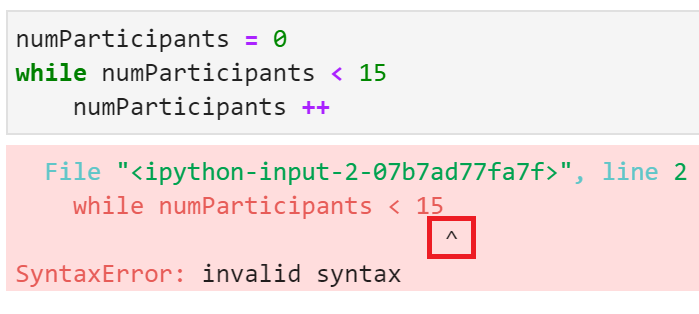</center> <br>

**`Exceptions`**, on the other hand, only occur when code is executed. Thus, the code is syntactically correct, but errors occur during its execution.

If you suspect that exceptions may occur during runtime, you should handle them explicitly in your code instead of having the program 'crash'.

---
<a name="raisingException"></a>
## [Raising an Exception](#top)
But before looking at how to react on _occurring_ exceptions, we need to understand how they are raised and how we can raise exceptions ourself.
We can do this by constructing an exception object and throw or raise it with the built-in keyword `raise`. 
```
raise Exception("Message To Be Printed") # "Message To Be Printed" is optional
```
The execution of the code is interrupted at this point (`raise ...`) and is not continued afterwards. The program is therefore stopped. 

A typical example of this is intercepting a division by 0. For this, throwing the predefined Exceptions `ZeroDivisionError` with the message `"Division by zero is not defined!"` is suitable:

In [ ]:
def our_division(x, y):
    print (f"We try to divide {x} by {y}")
    if (y == 0):
        raise ZeroDivisionError(f"Dividing {x} by zero is not defined, dummy!")
    return x/y

In [ ]:
our_division(12,3)

In [ ]:
our_division(12,0)

The _normal_ execution of code is stopped before our function tries to divide by zero and return the non-defined result. Instead, we explicitly raise our exception object, which carries the textual information of what has happened.

When an exception is raised, we know that the interpreter shows the traceback and prints out the error message in the last line. We can even inform about the current values and situation in this message (trying to divide current value 12 by zero ...).

Raising exceptions to deal with _edge cases_ is a good practice to prevent side effects. By this, we hand over the responsibility of handling the error to the code, calling this function.

---
<a name="exceptionHandling"></a>
## [Exception Handling](#top)
Instead of raising an exception and therefore stopping the programme at this position, you can also handle the exception. For this purpose, `Python` provides the `try ... except` block:

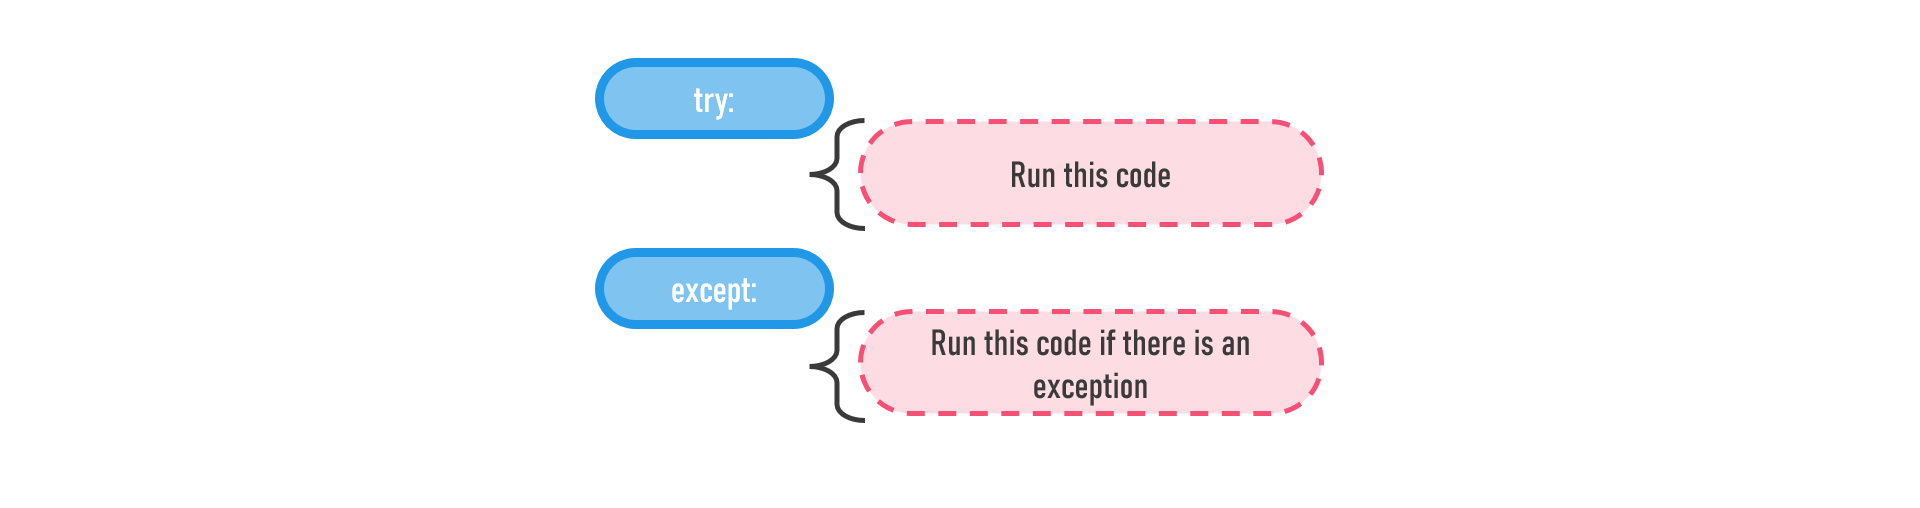

In [ ]:
def to_int_safe(x):
    try:
        z = int(x)
    except:
        print (f"We cannot convert {x} to int!")
        return None # we cannot return an int value
    return z

In [ ]:
to_int_safe ("5")

In [ ]:
to_int_safe ("5.5")

The function `to_int_safe` catches all possible exceptions. If any exception occurs within the `try` part, it will be aborted and the code in the `except` part will be executed. `None` is returned in this case such that the code, calling the `to_int_safe` function, that something went wrong.

That `None` might be returned as possible result must be known by the developers using our function in order to react appropriately!

However, with the help of the `try ... except` block you can also filter for certain exceptions by specifying them, such as `except ValueError:`.
This can be used, for example, to check the correctness of a user's input:

In [ ]:
while True:
    try:
        x = input("Please enter an integer: ")
        x = int(x)
        break   # the endless while loop, when no Exception is raised
    except ValueError:
        print(f"Oops! >>{x}<< is no valid integer. Please, try again...")

print("Fine, now we can use your integer input: ", x)

It is also possible to integrate `raise` within the `try ... except` block. Our function `our_division` throws a `ZeroDivisionError` as soon as the second parameter is 0. If this function is now called within the `try` part and a 0 is passed, the `ZeroDivisionError` is raised. The code is not stopped, instead it continues in the `except` part:

In [ ]:
try:
    print("  => ", our_division(12, int(input("Enter divisor: "))))
except Exception:
    print("Oops, sth. went wrong.")
    print("well, we continue without our division ...")
print("Ok. Here we continue anyways ...")

>__Note__: we caught and handled the _general_ `Exception` not the _specific_ `ZeroDivisionError` which was thrown by the function. There is a whole Exception hierarchy: `ZeroDivisionError` is an `ArtihmeticError`, which is an  `Exception`. When handling `Exception` in the except clause, we catch any exception, also the more specific ones. 

<a name="variousExceptions"></a>
### [Handling various errors](#top)
We can also specify various handlers for different exceptions within one try statement. At most one handler will be executed:

In [ ]:
try:
    print("  => ", our_division(12, int(input("Enter divisor: "))))
except ZeroDivisionError:
    print("Here we can handle the possible ZeroDivisionError ...")
except ArithmeticError:
    print("An ArithmeticError occurred. Do sth. appropriate ...")
except Exception:
    print( "Oops, sth. went wrong. (any of the many possible Exceptions)")
print("Ok. Here we continue anyways ...")
# try asdf and then 0  to see the differences

>__Note:__ The order of the different except clause is _important_. Since `Exception` is the most general case, it must not be specified before the other two. Also, the more general `ArithmeticError` must not be specified before the more specific `ZeroDivisionError`.

In [ ]:
try:
    print("  => ", our_division(12, int(input("Enter divisor: "))))
except ArithmeticError:
    print("An ArithmeticError occurred.")
except ZeroDivisionError:
    print("Here we handle the possible ZeroDivisionError ...")
except Exception:
    print( "Oops, sth. went wrong. (any of the many possible Exceptions)")
print("Ok. Here we continue anyways ...")
# try out various divisors
#  - 3
#  - 0
#  - asdf

In [ ]:
try:
    print("  => ", our_division(12, int(input("Enter divisor: "))))
except Exception:
    print("Oops, sth. went wrong. (any of the many possible Exceptions)")
except ZeroDivisionError:
    print("Here we could handle the possible ZeroDivisionError ...")
    print("..., but this will never be the case, because Exception is already handled.")
except ArithmeticError:
    print("An ArithmeticError occurred ...")
    print("..., but this will never be the case, because Exception is already handled.")
print("Ok. Here we continue anyways ...")
# try out various divisors
#  - 3
#  - 0
#  - asdf

---
<a name="exceptionHandlingCallStack"></a>
## [Exception Handling along the Call Stack](#top)

If an `Exception` cannot be handled by the caller of the function, which raises the exception, it will be forwarded to its caller, which can either handle the exception, or forward it to its caller up the calling hierachy.

To demonstrate this, let's define some funtions, to build a function calling hierarchy. In our first version none of these functions handle the raised exception, thus it get's forwarded to the highest level, which is the `IPython` interpreter, which handles all the upcoming the `Exception`s by printing out the complete traceback (function calling hierachy and spot, where the Exception occured). After that, the program is finished in a controlled manner (no program crash or blue screen) by Interpreter message.

In [ ]:
def f1():
    f2() # just call f2( ) to build a function calling stack
    print("f1: f2() has successfully finished.")
    
def f2():
    f3()
    print("f2: f3() has successfully finished.")
    
def f3():
    our_division(42, 0) # raises an Exception, not handled here
    print("f3: I have successfully finished.")

f1()
print("Program finished successfully.")

Knowing that the division might go wrong, ususally the calling function should handle the problem. In our case this would be function `f3()`. So if this function knows how to deal with the problem, we would change the code in `f3()`:

In [ ]:
def f3():
    try:
        our_division(42,0) # raises an Exception
    except ZeroDivisionError:
        print("Oh, sth. went wrong with the division. I (f3) can repair that. No one else will even notice ...")

f1()
print("Program finished successfully.")

But sometimes, the caller `f3()` just does not know, how to handle the problem, because it is missing the context. So we cannot use the `try .. except` in f3( ). So again, the problem is passed to `f2()`, which also might not know what to do with the situation, thus passing the `Exception` to `f1()`. Let's assume, here the programmer knows how to handle the problem and call the function after making some corrections:

In [ ]:
def f1():
    try:
        f2(0)
        print("f1: f2() has successfully finished.")
    except ZeroDivisionError:
        print("I f1() know how to handle errors: Better divide by sth. else than 0")
        f2(3)
        print("f1: f2() has successfully finished.")
    print("Ok, everything worked out fine. We can finish f1( ) and the program.")

def f2(i):
    f3(i)  # might raise an Exception, but I do not know what to do
    print("f2: f3() successfully finished.")
    
def f3(i):
    our_division(42,i) # might raise an Exception, but I do not know what to do
    print("f3: I have successfully finished.")

f1()
print("IPython: Program finished successfully.")

---
<a name="definingOwnExceptions"></a>
## [Defining our own Exceptions](#top)
So far, we have used one of the predefined `Exception`s. There are exceptions for many of the situations which might go wrong, such as `IndexError` when iterating or slicing with indices out of range, `TypeErrors` when converting, `ArithmeticErrors` when computing, or `FileNotFoundError` or `ConnectionError` when trying to read data from various streams. So most cases are covered by the built in exceptions.

We can also define our own exception classes for our programs, if the exceptions shall transport more information about the error case. For the zoo example we might want to raise an `AnimalNotAliveError` if any operation is performed on a non-living animal.

You already got to know the principle of __inheritance__ in the [object-oriented lecture](09_ObjectOrientation.ipynb#inheritance). 

---
<a name="inheritingFromException"></a>
### [Inheriting from Exception](#top)
For exceptions, we build on the already existing hierarchy of exceptions, when defining `AnimalNotAliveError` for our zoo example. We need not to implement everything which is needed for a class to be raised and caught, which needs some knowledge about the run time environment and sometimes OS specific implementations. So we inherit all the features from the class `Exception`, and only add our own properties and functionality.

In [ ]:
class AnimalNotAliveError(Exception):
    pass

In [ ]:
anae = AnimalNotAliveError('Animal not alive.')
raise anae

In [ ]:
help(anae) # see all the inherited properties

Our specific information, which might be added to the normal exception, is the name of the zoo animal, which is still in the list of publicly displayed animals for the feeding day so the `Zoo` object can act accordingly. For demonstration reasons we thus enhance our `Animal` class definition by adding another attribute, which carries the name of each of the `Animal` objects in the zoo.

In [ ]:
class AnimalNotAliveError(Exception):
    '''Exception class to be raised if an animal is not alive anymore,
       but an operation is performed on that non-living animal'''
    
    def __init__(self, title, name):
        Exception.__init__(self, title)
        self.name = name
        
    def __str__(self):
        return Exception.__str__(self) + f"\nThe animal {str(self.name)} is not alive anymore"

Now with this exception class, we could enhance our classes `Animal` and `Carnivore` accordingly, as for example within the function `feed()`:

In [ ]:
class Animal:

    def __init__(self, initial_weight, name):
        self.weight_in_grammes = initial_weight
        self.name = name                   # our zoo animals have names
        self.is_alive = True

    def feed(self, food_in_grammes):
        ##############################################################
        ### raising AnimalNotAliveError when an animal is not alive anymore
        if not self.is_alive:
            raise AnimalNotAliveError("Animal not alive.", self.name)
        ##############################################################
        self.weight_in_grammes += (food_in_grammes * 0.05)

    def kill(self):
        self.is_alive = False

    def __str__(self):
        return f"A{'n' if self.is_alive else ' dead'} animal weighing {self.weight_in_grammes} grammes"
    
    
class Carnivore(Animal):

    def feed(self, food):
        ##############################################################
        ### raising AnimalNotAliveError when an animal is not alive anymore
        if not self.is_alive:
            raise AnimalNotAliveError("Animal not alive.", self.name)
        ##############################################################
        if isinstance(food, Animal):
            food.kill()
            self.weight_in_grammes += food.weight_in_grammes * 0.1
        else:
            Animal.feed(self, food)
           
        
class Seal(Carnivore):

    def __init__(self, *args, **kwargs):
        self.tricks = list()
        super().__init__(*args, **kwargs)

    def learn_trick(self, trick_name):
        self.tricks.append(trick_name)
        

class Zoo:

    def __init__(self):
        self.animals = set()

    def add_animal(self, animal):
        self.animals.add(animal)

    def public_feeding_day(self):
        print("PUBLIC FEEDING ONGOING")
        for animal in self.animals:
            print("Now feeding", animal)
            animal.feed(animal.weight_in_grammes * 0.02)
        print("PUBLIC FEEDING FINISHED")

We first create the zoo that we already know from the last two lectures and feed the animals:

In [ ]:
zoo = Zoo()
simba = Carnivore(250_000, "Simba")
sharp_seal = Seal(50_000, "Sharp Seal")
nemo = Animal(500, "Nemo")

zoo.add_animal(simba)
zoo.add_animal(sharp_seal)
zoo.add_animal(nemo)

zoo.public_feeding_day()

Unfortunately, the `sharp_seal` became seriously sick in the zoo and later died. However, it is still in the zoo's animal listing, so an error should be made here that the `sharp_seal` is not alive when all animals are fed:

In [ ]:
sharp_seal.kill()

zoo.public_feeding_day()

So far, the feeding of the animals stops at this point because the exception `AnimalNotAliveError` is thrown, but not handled in our program.

The Zoo class is therefore extended so that such an error can be dealt with accordingly:

In [ ]:
class Zoo:

    def __init__(self):
        self.animals = set()

    def add_animal(self, animal):
        self.animals.add(animal)

    def public_feeding_day(self):
        print("PUBLIC FEEDING ONGOING")
        for animal in self.animals:
            try:
                print("Now feeding", animal)
                animal.feed(animal.weight_in_grammes * 0.02)
            except AnimalNotAliveError as anae:
                # the exception object carries information to be used by the hanlder:
                print('Inform the zoo director that the animal', anae.name, 'must be removed from the set of animals.' )
        print("PUBLIC FEEDING FINISHED")

In [ ]:
zoo = Zoo()
simba = Carnivore(250_000, "Simba")
sharp_seal = Seal(50_000, "Sharp Seal")
nemo = Animal(500, "Nemo")

zoo.add_animal(simba)
zoo.add_animal(sharp_seal)
zoo.add_animal(nemo)

zoo.public_feeding_day()

sharp_seal.kill()

zoo.public_feeding_day()

> **Reminder:** Similar to [importing external modules with a shorter name](05_ExternalModules.ipynb), exceptions can also be used with a shorter name afterwards (`except AnimalNotAliveError as anae:`)

---
# Exceptions: Summary
In this section, we have learned the following about _Exceptions_:

* how to `raise` them to indicate an error state
* how to recover from errors during program execution using `try...except`
* how to define our own Exception classes

In the [next lecture](08_Pandas.ipynb), you will get to know the library `Pandas`, which is a popular Python package for exploration and analysis of large datasets.
